In [ ]:
#Estimate expected feels-like temperature (atemp)

In [ ]:
#Import all the necessary libraries here
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import shutil


In [ ]:
df=pd.read_csv('Bike sharing.csv')

In [33]:
print(len(df))
df.head()

730


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [ ]:
#The columns that should be dropped before modeling are:
#instant, dtedayinstant: Just an index/identifier.
#dteday: Raw date column (can be transformed into features instead).df.drop(columns=['dteday'], inplace=True)
df.drop(columns=['instant'], inplace=True)
df.drop(columns=['dteday'], inplace=True)


In [ ]:
df.info()
df.drop

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   dteday          730 non-null    object 
 1   season          730 non-null    int64  
 2   yr              730 non-null    int64  
 3   mnth            730 non-null    int64  
 4   holiday         730 non-null    int64  
 5   weekday         730 non-null    int64  
 6   workingday      730 non-null    int64  
 7   weathersit      730 non-null    int64  
 8   temp            730 non-null    float64
 9   atemp           730 non-null    float64
 10  hum             730 non-null    float64
 11  windspeed       730 non-null    float64
 12  casual          730 non-null    int64  
 13  registered      730 non-null    int64  
 14  cnt             730 non-null    int64  
 15  expected_atemp  730 non-null    float64
dtypes: float64(5), int64(10), object(1)
memory usage: 91.4+ KB


In [67]:
df['cnt'] = df['cnt'].astype(float)

Observations
On visual exmaination of the csv files it is noticed that there are 0(zero) humidity rows. which is not practiacally prossible.
Also some of the days the humidity , and temperature variations are not practical . 
Feels-like temperature (atemp) significantly higher than expected based on:
Actual temperature
Humidity
Wind speed

expected_atemp = temp + 0.33 * hum / 100 * temp - 0.7 * windspeed - 4.0
Where:
temp: actual temperature (°C)
hum: relative humidity (%)
windspeed: wind speed (normalized)
expected_atemp: estimated feels-like temperature

In [68]:
#Define a function to calculate expected feels-like temperature
def calculate_expected_atemp(row):
    temp = row['temp']
    hum = row['hum']
    wind = row['windspeed']
    # Simplified heat index approximation
    expected_atemp = temp + 0.33 * hum / 100 * temp - 0.7 * wind - 4.0
    return expected_atemp

In [38]:
# Apply the function and compare with actual atemp
df['expected_atemp'] = df.apply(calculate_expected_atemp, axis=1)
print(len(df))
df.head()

730


,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,expected_atemp
0,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985,6.338355
1,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801,2.669375
2,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,-6.433019
3,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,-1.720165
4,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,-2.118597


In [69]:
#Step 1: Drop rows where humidity is 0
df_cleaned = df[df['hum'] != 0]

In [70]:
print(len(df_cleaned))


729


In [71]:

#Drop rows where actual atemp deviates significantly from expected
threshold = 10  # degrees Celsius
df_final = df_cleaned[abs(df_cleaned['atemp'] - df_cleaned['expected_atemp']) > threshold]

In [72]:
print(len(df_final))

484


In [73]:
#df_final.to_csv('df_final.csv', index=False)
#df_final

#Data analysis.
#I want to perform some univariate analysis on the continous variable and also on the categorial variables to see what are the trendsb

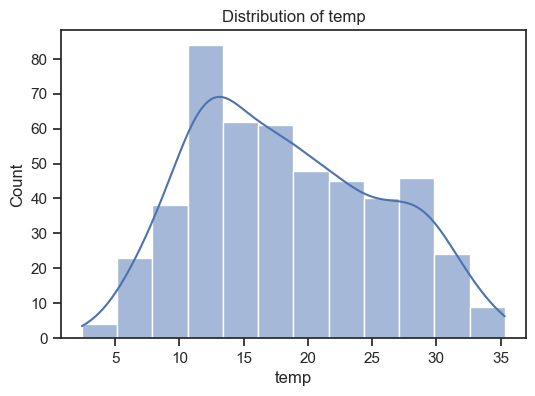

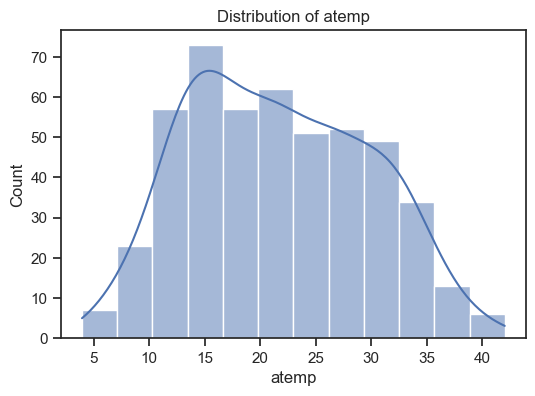

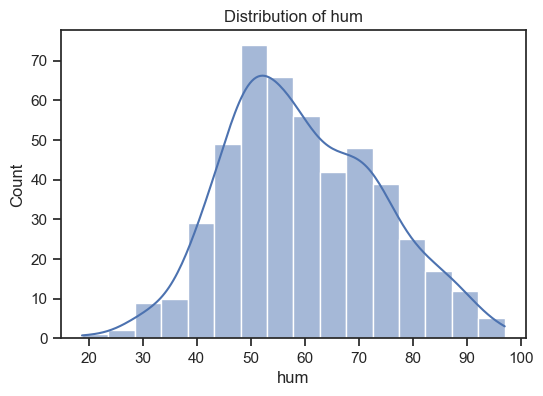

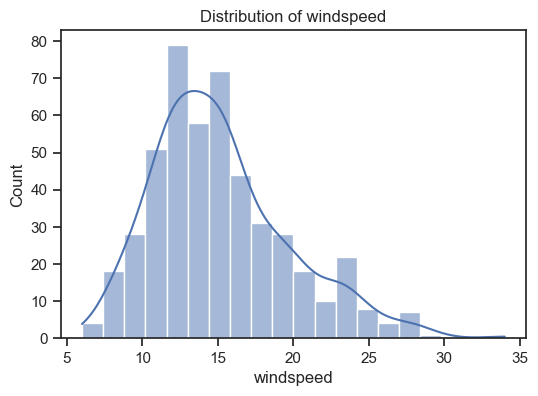

In [61]:
# Continuous variables
continuous_vars = ['temp', 'atemp', 'hum', 'windspeed']

for col in continuous_vars:
    plt.figure(figsize=(6,4))
    sns.histplot(df_final[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()



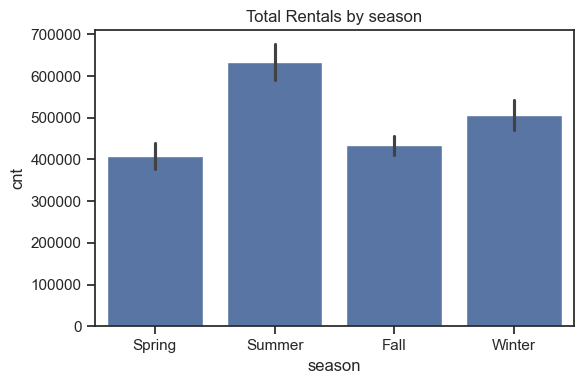

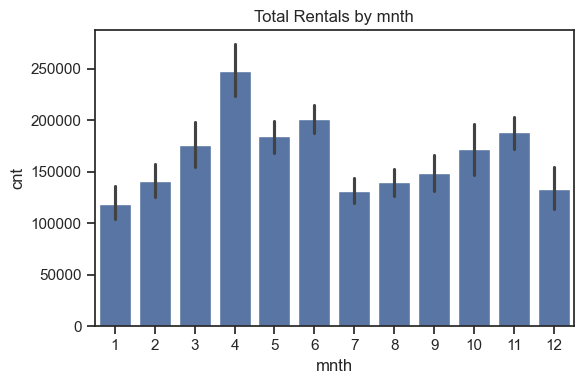

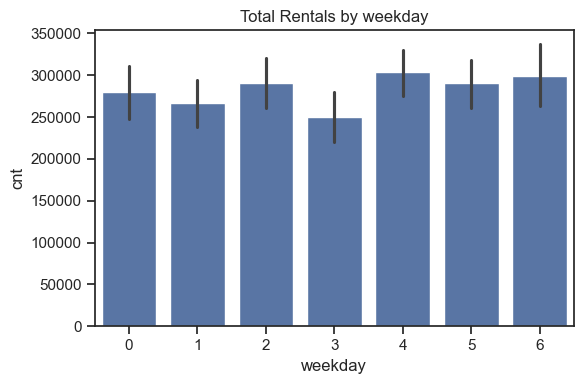

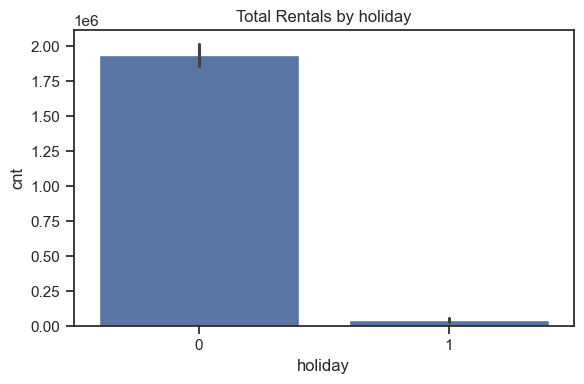

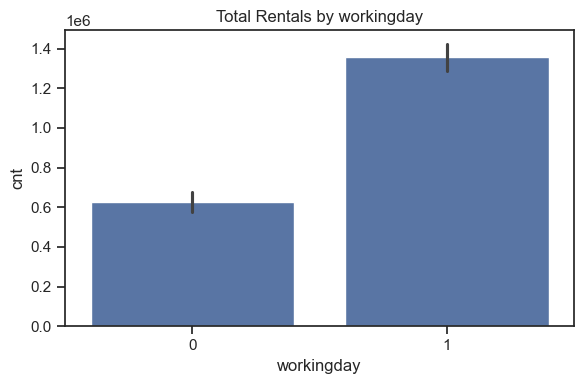

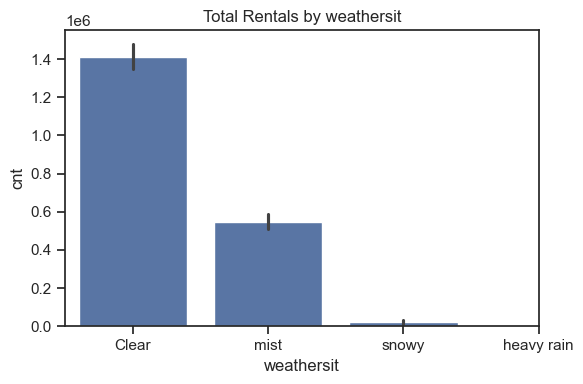

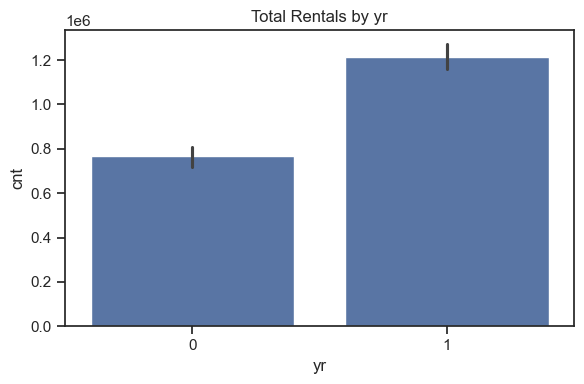

In [114]:

# Univariate analysis for categorical variables

# Categorical variables
categorical_vars = ['season', 'mnth', 'weekday', 'holiday', 'workingday', 'weathersit', 'yr' ]

for col in categorical_vars:
    plt.figure(figsize=(6,4))
    sns.barplot(x=col, y='cnt', data=df_final, estimator=sum)
    plt.title(f"Total Rentals by {col}")
    if col == 'season':
     plt.xticks([0, 1, 2, 3], ['Spring', 'Summer', 'Fall', 'Winter'])
    if col == 'weathersit':
      plt.xticks([0,1,2,3],['Clear','mist','snowy','heavy rain'])
    plt.tight_layout()    
    plt.show()


season: Fall (3) and Summer (2) have the highest total rentals, Spring (1) the lowest.
mnth: Peak rentals occur in summer months (6-9), lowest in winter months (1-2, 12).
workingday: Working days have higher rentals than non-working days.
weathersit: Clear weather (1) dominates rentals, mist (2) moderate, snow/rain (3) very low.
yr: Year 2019 (1) has significantly higher rentals than 2018 (0), indicating growth.
windspeed:most days have light winds.


C:\Users\I065659\AppData\Local\Temp\ipykernel_20616\2477943140.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['season'] = df_final['season'].map(season_map)


Segmentation Analysis by Season:
   season  casual              registered             
              sum         mean        sum         mean
0    Fall   98182  1182.915663     335584  4043.180723
1  Spring   50202   311.813665     357445  2220.155280
2  Summer  137763  1051.625954     495683  3783.839695
3  Winter   76270   699.724771     430926  3953.449541


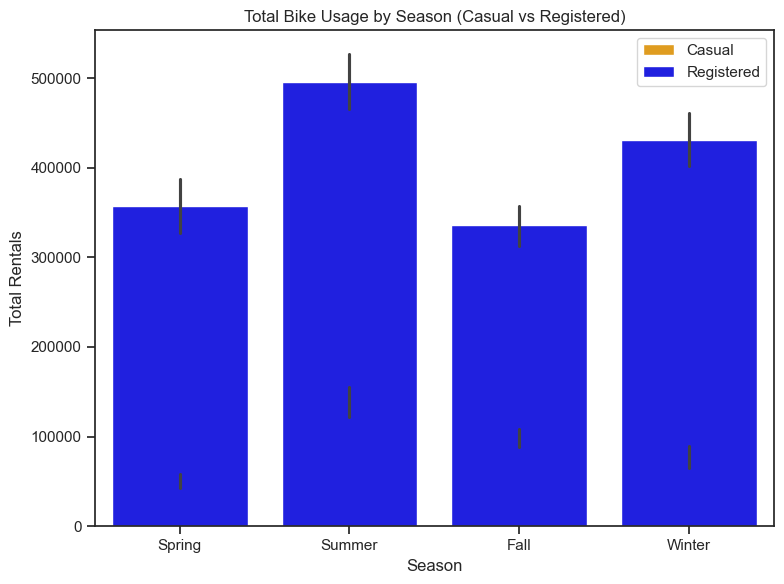

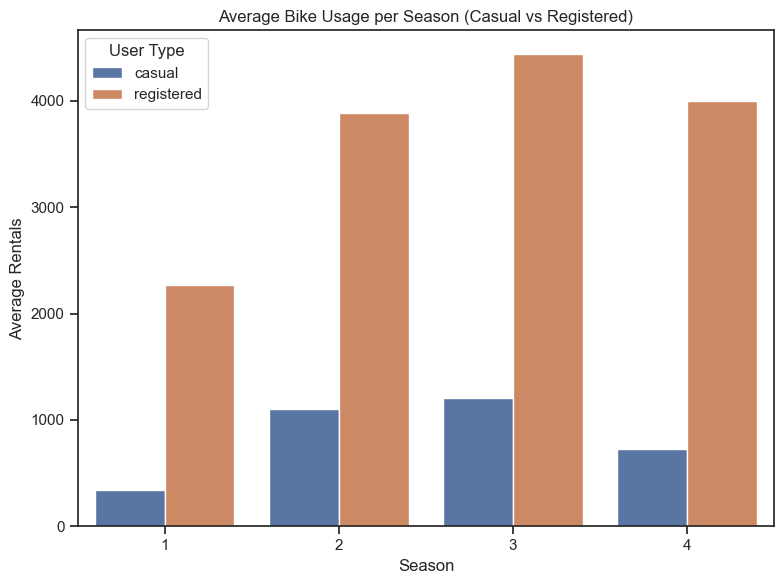

In [63]:
# Map season codes to names for better readability
season_map = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
df_final['season'] = df_final['season'].map(season_map)

# Segmentation: Group by season and calculate total and average usage for casual and registered users
segmentation = df_final.groupby('season')[['casual', 'registered']].agg(['sum', 'mean']).reset_index()

print("Segmentation Analysis by Season:")
print(segmentation)

# Visualization: Compare casual vs registered usage by season
plt.figure(figsize=(8, 6))
sns.barplot(x='season', y='casual', data=df_final, estimator=sum, color='orange', label='Casual')
sns.barplot(x='season', y='registered', data=df_final, estimator=sum, color='blue', label='Registered')
plt.title("Total Bike Usage by Season (Casual vs Registered)")
plt.xlabel("Season")
plt.ylabel("Total Rentals")
plt.legend()
plt.tight_layout()
plt.show()

# Visualization: Average usage per season for casual and registered
avg_usage = df.groupby('season')[['casual', 'registered']].mean().reset_index()
avg_usage_melted = avg_usage.melt(id_vars='season', value_vars=['casual', 'registered'], var_name='User Type', value_name='Average Usage')

plt.figure(figsize=(8, 6))
sns.barplot(x='season', y='Average Usage', hue='User Type', data=avg_usage_melted)
plt.title("Average Bike Usage per Season (Casual vs Registered)")
plt.xlabel("Season")
plt.ylabel("Average Rentals")
plt.tight_layout()
plt.show()

- The number of rentals per day seem to be increasing with temperature and feel like temperature
- feel like temperature and temperature have similar trends
- temp vs cnt has two outliers between 15 and 30
- atemp vs cnt has two outliers between 20 and 35
- hum vs cnt has two outliers below 20
- windspeed vs cnt has one outlier above 30

In [ ]:
#Bivariate Analysis

In [74]:
corr_matrix = df_final.corr(numeric_only=True)
#Compute correlation matrix
corr_matrix = df_final.corr()

# Get correlations with the target variable 'cnt'
target_corr = corr_matrix['cnt'].sort_values(ascending=False)

# Display the top correlated features (excluding 'cnt' itself)
print("Top correlated features with 'cnt':", target_corr)


Top correlated features with 'cnt': cnt               1.000000
registered        0.948807
casual            0.692012
atemp             0.621424
temp              0.611607
expected_atemp    0.586737
yr                0.551324
season            0.436956
mnth              0.301274
workingday        0.057142
weekday           0.042338
holiday          -0.087550
windspeed        -0.104720
hum              -0.173959
weathersit       -0.327054
Name: cnt, dtype: float64


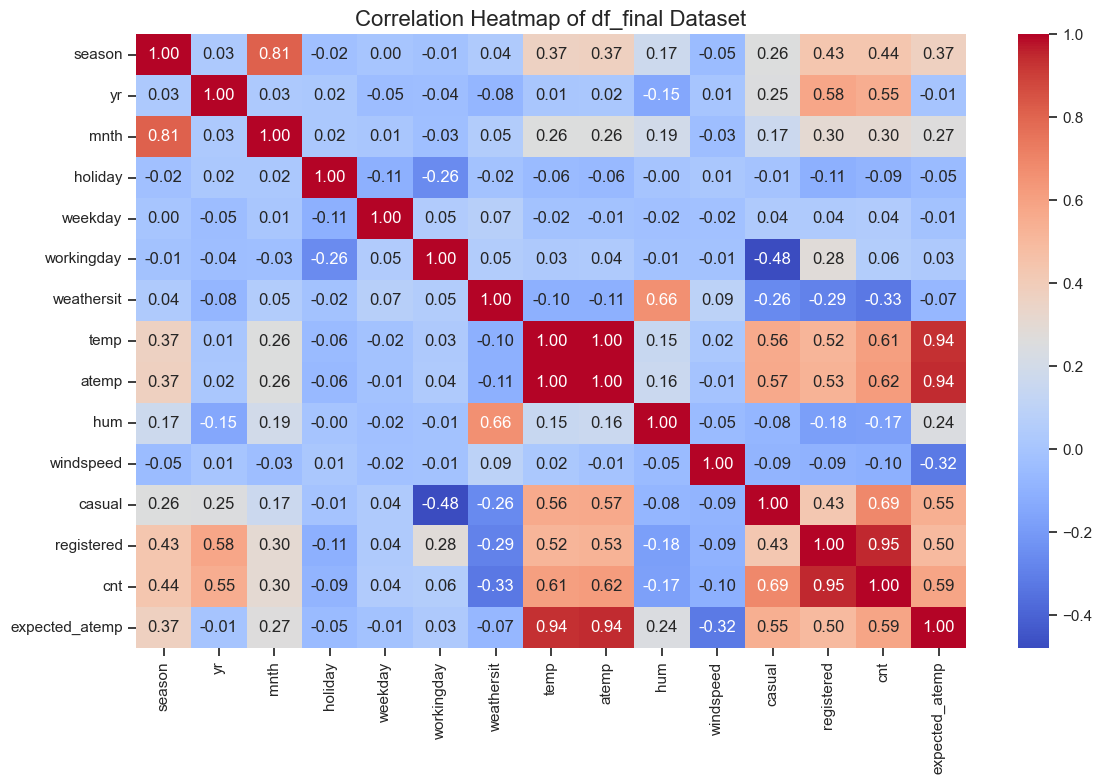

In [75]:
plt.figure(figsize=(12, 8))

# Create the heatmap
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)

# Add title
plt.title('Correlation Heatmap of df_final Dataset', fontsize=16)

# Show the plot
plt.tight_layout()
plt.show()


#Draw the pair plots

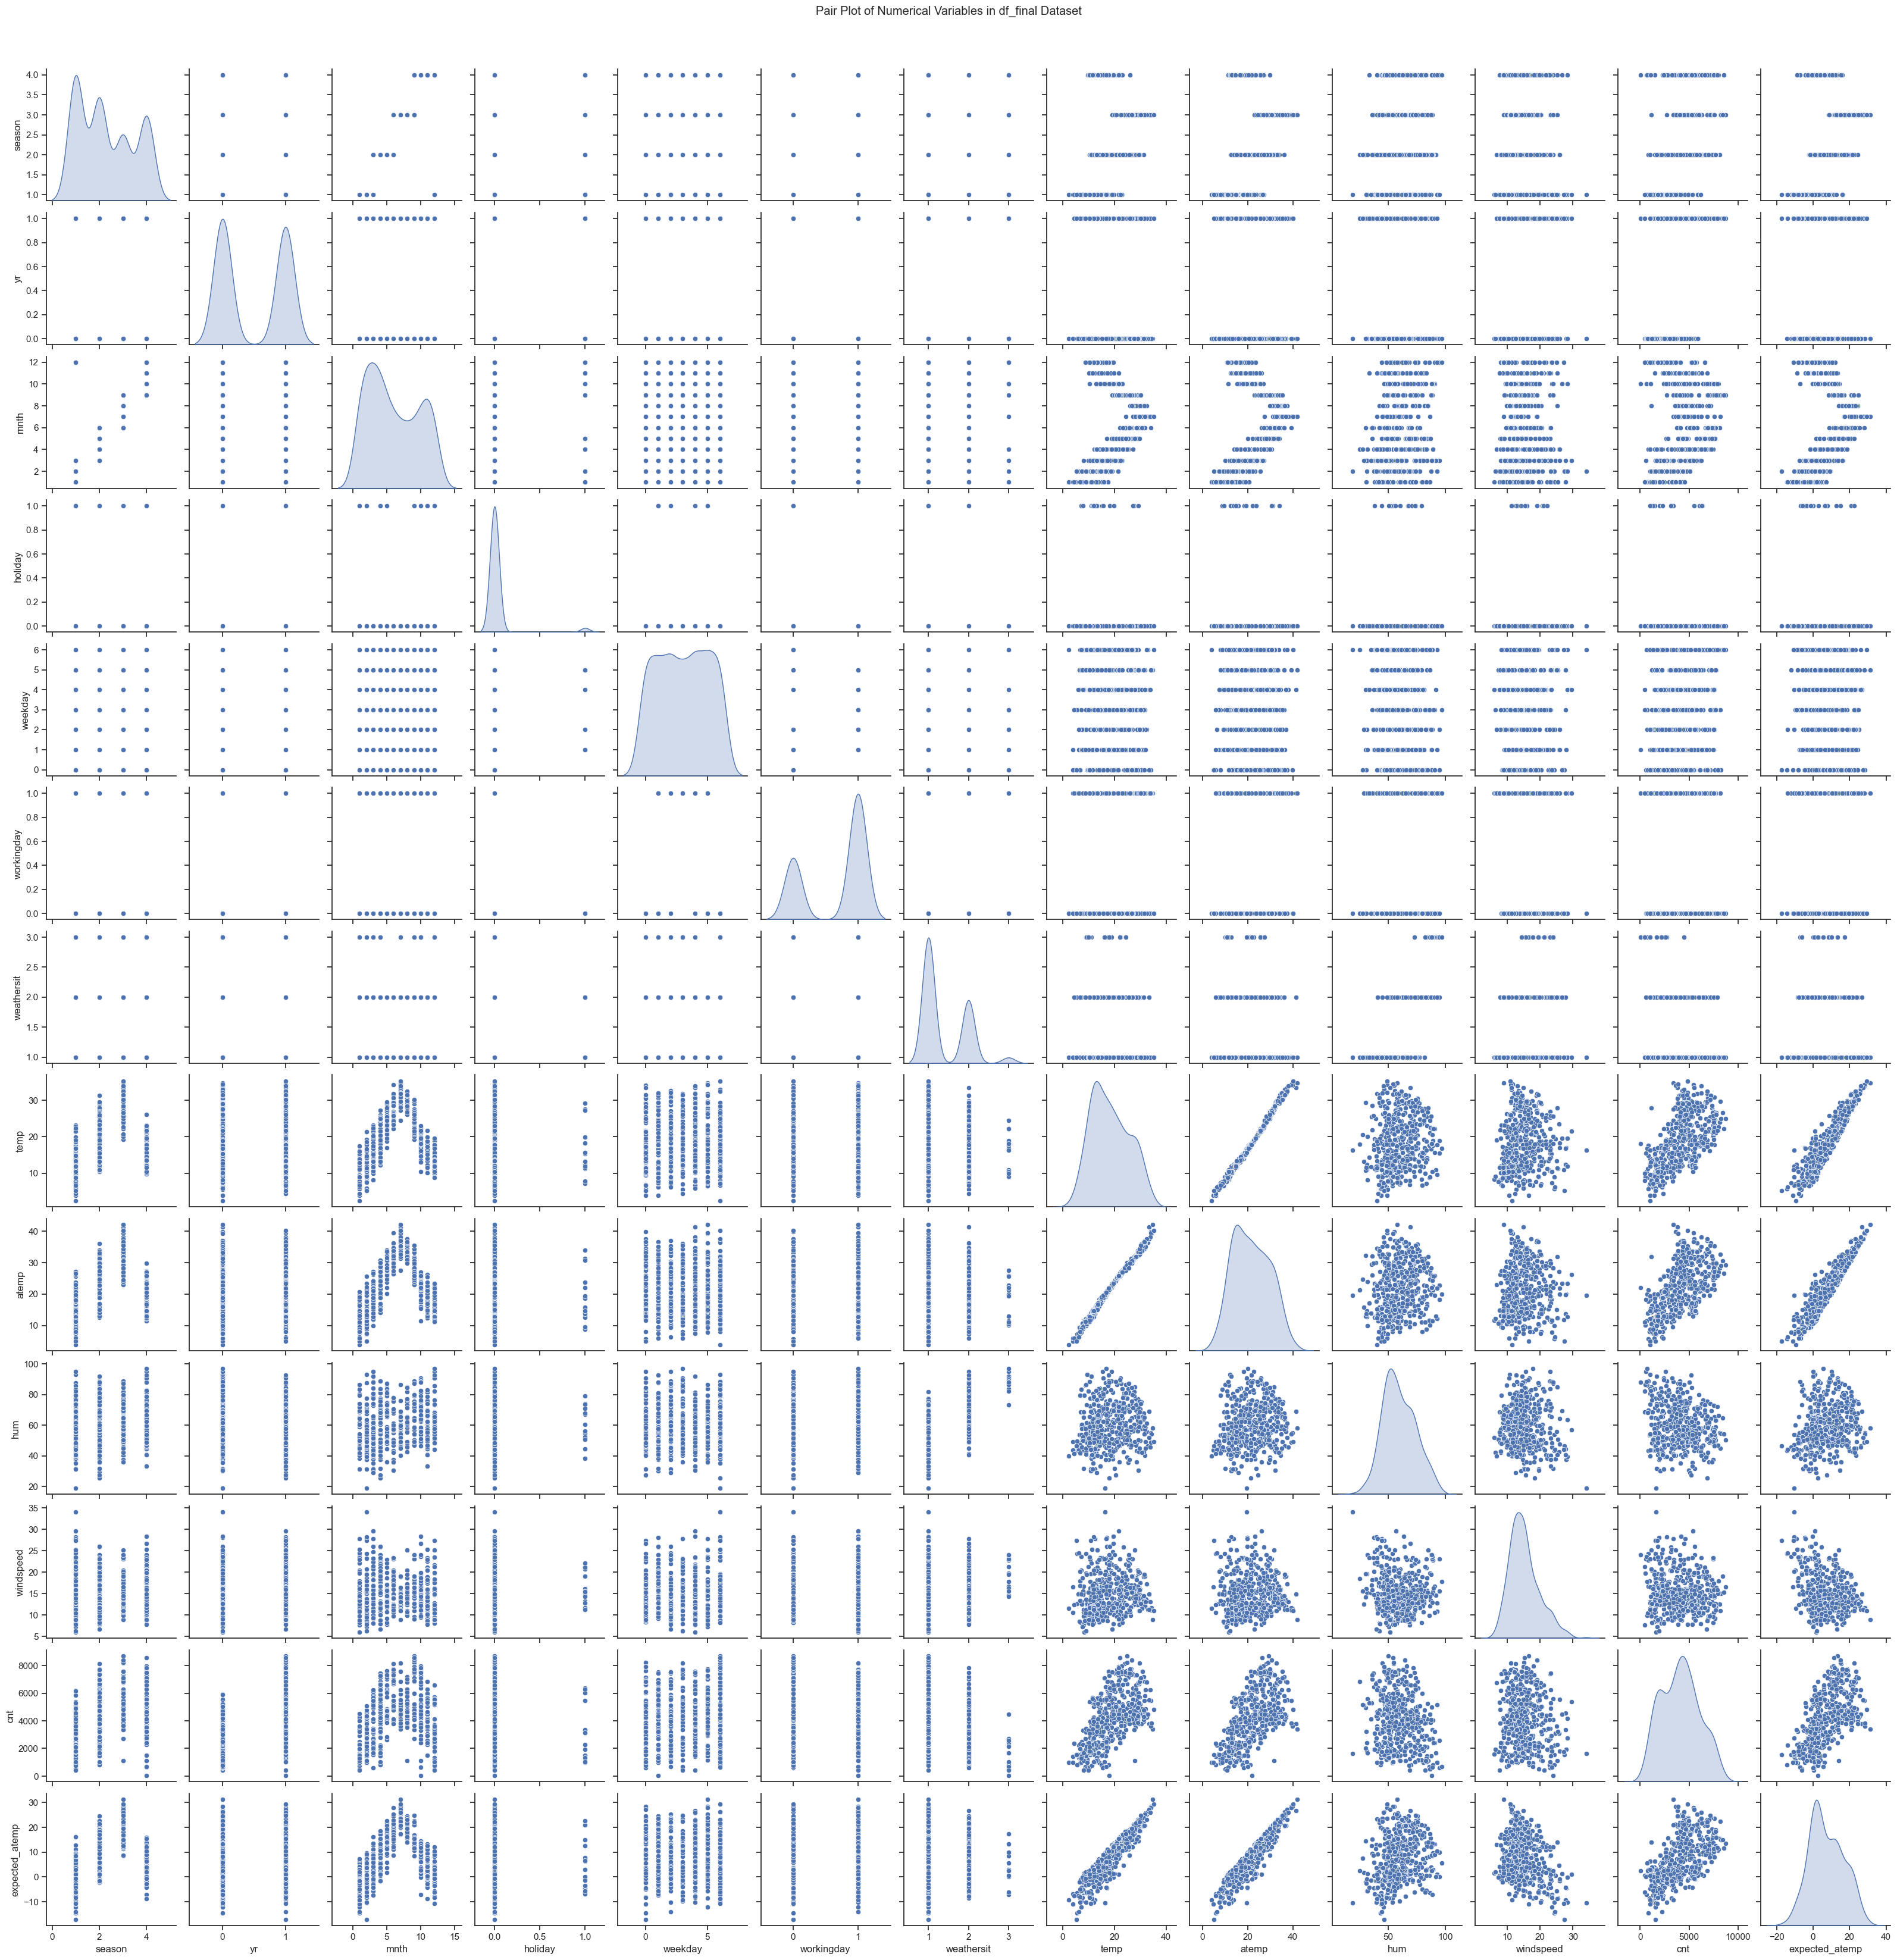

In [115]:
# Select only numerical columns
numeric_cols = df_final.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Create the pair plot
sns.set(style="ticks")
pair_plot = sns.pairplot(df_final[numeric_cols], diag_kind='kde')
# Add a title
pair_plot.figure.suptitle('Pair Plot of Numerical Variables in df_final Dataset', y=1.02)

#shutil.make_archive('pair_plots', 'zip')
#print("All pair plots have been zipped into 'pair_plots.zip'")


# Show the plot
plt.show()

From the plots it is clear that registered users has the highest corelation with the count. But we cannot use this because logically they are constnat and well known fact now.
WE will exclude registered and casual because they are components of cnt (the target variable).
Including them would be trivial since cnt = registered + casual, so their correlation will always be extremely high and not meaningful for predictive insights.
The independent predictors that influence bike rentals are atemp, temp with the next highest correlation as evident from the claculation and pair plots.

In [77]:
df_final.drop(columns=['registered'], inplace=True)
df_final.drop(columns=['casual'], inplace=True)

C:\Users\I065659\AppData\Local\Temp\ipykernel_20616\3728776184.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final.drop(columns=['registered'], inplace=True)
C:\Users\I065659\AppData\Local\Temp\ipykernel_20616\3728776184.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final.drop(columns=['casual'], inplace=True)


Model Building

In the dataset provided, you will notice that there are three columns named 'casual', 'registered', and 'cnt'. The variable 'casual' indicates the number casual users who have made a rental. The variable 'registered' on the other hand shows the total number of registered users who have made a booking on a given day. Finally, the 'cnt' variable indicates the total number of bike rentals, including both casual and registered. The model should be built taking this 'cnt' as the target variable.
For model building or feature importance, we should exclude derived or target-related columns like registered and casual.
Then, the highest correlations with cnt come from:

atemp (~0.62)
temp (~0.61)
expected_atemp (~0.58)
yr (~0.23)
season (~0.16)

- Split Data into training and test
Preparing the data for model training (train-test split, rescaling)
Splitting the data to Train and Test: - We will now split the data into TRAIN and TEST (80:20 ratio)
We will use train_test_split method from sklearn package for this

In [91]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 2. Define features (X) and target (y)
# We'll use temp, atemp as predictors (you can add more)
X = df_final[['temp', 'atemp']]
y = df_final['cnt']


# 3. Split into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# 4. Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)


#dtrain,dtest = train_test_split(df_final,train_size=0.8,test_size=0.2,random_state=120)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [ ]:
#y_train = dtrain.pop('cnt')
#X_train = dtrain


In [ ]:
y_train.head()

625    4073.0
25      506.0
320    3053.0
570    8173.0
340     705.0
Name: cnt, dtype: float64

In [93]:
X_train.head()

,temp,atemp
625,25.556653,28.25335
25,8.917500,10.18000
320,14.008347,16.16105
570,29.690847,32.70270
340,16.810000,20.01230


In [94]:
X_train.columns

Index(['temp', 'atemp'], dtype='object')

In [ ]:
# 5. Predict on test data
y_pred = model.predict(X_test)



In [97]:

# 6. Evaluate the model
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))


Coefficients: [-272.93184394  393.74345967]
Intercept: 626.8445775234113
Mean Squared Error: 2568156.1968532475
R² Score: 0.3424965163703029


In [98]:
# 7. Show some predictions vs actual
print("\nSample Predictions:")
comparison = pd.DataFrame({'Actual': y_test[:10].values, 'Predicted': y_pred[:10]})
print(comparison)



Sample Predictions:
   Actual    Predicted
0  7733.0  5266.687356
1  4128.0  3533.551795
2  4334.0  5471.189914
3  5315.0  3416.812368
4  3487.0  4157.692963
5  4258.0  6294.187373
6  7665.0  5281.895179
7  7442.0  5275.734129
8   441.0  2241.632163
9  2914.0  4384.301779


In [101]:


# Sample data
data = {
    'Actual': [7733.0, 4128.0, 4334.0, 5315.0, 3487.0, 4258.0, 7665.0, 7442.0, 441.0, 2914.0],
    'Predicted': [5266.687356, 3533.551795, 5471.189914, 3416.812368, 4157.692963, 6294.187373,
                  5281.895179, 5275.734129, 2241.632163, 4384.301779]
}

# Create DataFrame
predict_frame1 = pd.DataFrame(data)

# Calculate absolute error
predict_frame1['Absolute_Error'] = abs(predict_frame1['Actual'] - predict_frame1['Predicted'])

# Calculate error percentage
predict_frame1['Error_Percentage'] = (predict_frame1['Absolute_Error'] / predict_frame1['Actual']) * 100

# Display results
print(predict_frame1)
print(f"\nAverage Error Percentage: {predict_frame1['Error_Percentage'].mean():.2f}%")

   Actual    Predicted  Absolute_Error  Error_Percentage
0  7733.0  5266.687356     2466.312644         31.893349
1  4128.0  3533.551795      594.448205         14.400393
2  4334.0  5471.189914     1137.189914         26.238807
3  5315.0  3416.812368     1898.187632         35.713784
4  3487.0  4157.692963      670.692963         19.234097
5  4258.0  6294.187373     2036.187373         47.820276
6  7665.0  5281.895179     2383.104821         31.090735
7  7442.0  5275.734129     2166.265871         29.108652
8   441.0  2241.632163     1800.632163        408.306613
9  2914.0  4384.301779     1470.301779         50.456478

Average Error Percentage: 69.43%


Since the error percentage too high so tgis model is not tye right one. We need to find a better model using the RFE concepts.
But again RFE is also very cumbersome and so is MLR. 
Since we have only one target variable count which is to be predicted . We can use the method of Lasso regression . that will help automatically perform feature selection and shrinkage, making them much easier and more robust for high-dimensional data.

In [103]:
from sklearn.linear_model import Lasso

# Features and target
df_lasso = df_final
X = df_lasso.drop(columns=['cnt'])  # Drop target column
y = df_lasso['cnt']

# Split data (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Lasso model with alpha (regularization strength)
lasso = Lasso(alpha=0.1)  # You can tune alpha
lasso.fit(X_train, y_train)

# Predict
y_pred = lasso.predict(X_test)

# Evaluate
print("Coefficients:", lasso.coef_)
print("Intercept:", lasso.intercept_)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))


# Check which features were selected (non-zero coefficients)
selected_features = X.columns[lasso.coef_ != 0]
print("Selected Features:", selected_features)




Coefficients: [ 453.79854632 1946.75320295  -26.71631619 -439.08872105   76.1328612
   25.45331769 -640.30421644   67.17909552  241.2879495    -3.25876498
 -141.93846124 -164.69086755]
Intercept: 63.16154621855367
Mean Squared Error: 776350.7080667501
R² Score: 0.8012374419835807
Selected Features: Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'expected_atemp'],
      dtype='object')


c:\Users\I065659\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.256e+08, tolerance: 1.404e+05
  model = cd_fast.enet_coordinate_descent(


In [105]:
df_lasso

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,expected_atemp
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985.0,6.338355
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801.0,2.669375
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349.0,-6.433019
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562.0,-1.720165
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600.0,-2.118597
...,...,...,...,...,...,...,...,...,...,...,...,...,...
724,1,1,12,0,3,1,3,9.976653,11.01665,82.3333,21.208582,441.0,-6.158699
725,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,2114.0,-7.755088
726,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,3095.0,1.117344
728,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,1796.0,-8.288191


#Validation
Assumptions to Validate for Lasso

 Linearity: The relationship between predictors and target should be linear.
 Independence of errors: Residuals should be independent.
 Homoscedasticity: Residuals should have constant variance.
 Normality of residuals: Residuals should be approximately normal.
 No perfect multicollinearity: Lasso helps reduce multicollinearity but doesn’t eliminate the need to check.
 Feature scaling: Important for Lasso because of the penalty term (we already scaled features in the pipeline).

How to Validate After Building Lasso Model

 Residual Analysis:

    Plot residuals vs predicted values → should be randomly scattered.
    Histogram or Q-Q plot of residuals → should look normal.


Durbin-Watson Test for independence.
Check Homoscedasticity → no funnel shape in residual plot.
Normality Test → Shapiro-Wilk or KS test.
Multicollinearity → VIF (though Lasso mitigates this).

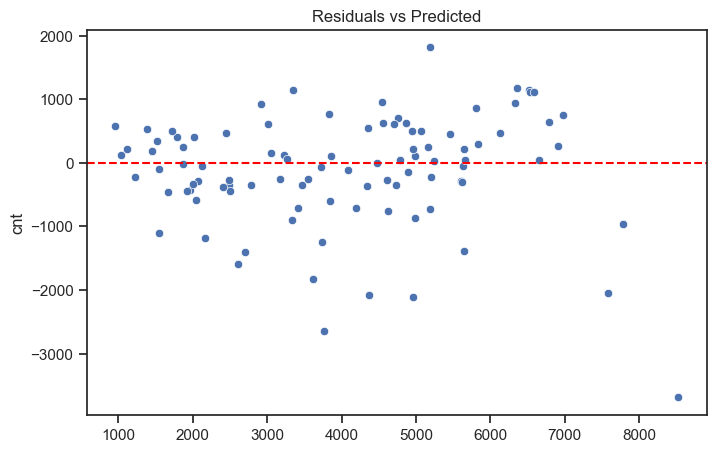

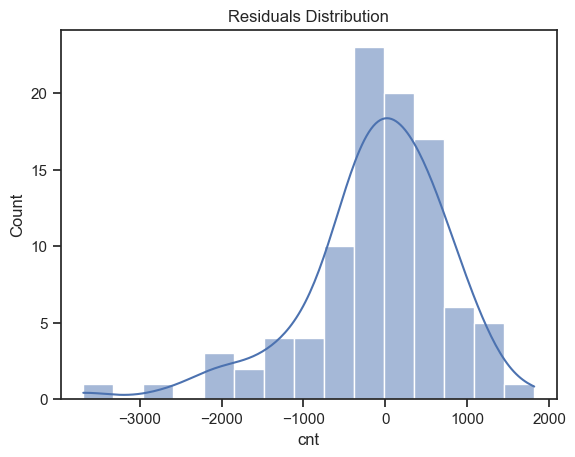

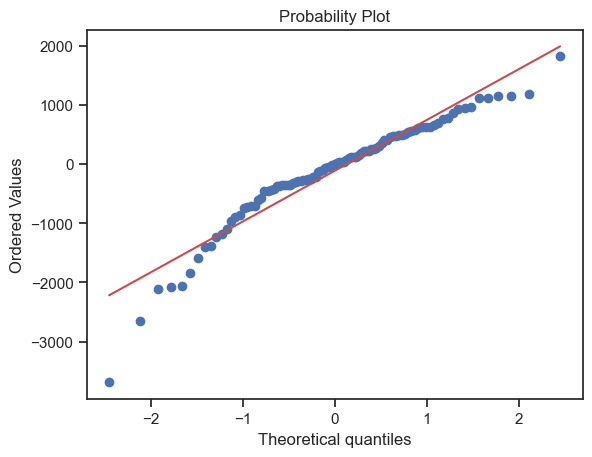

Shapiro-Wilk Test: Statistic=0.9312, p-value=0.0001
           Feature          VIF
0           season     3.492046
1               yr     1.033495
2             mnth     3.275057
3          holiday     1.086916
4          weekday     1.045237
5       workingday     1.095689
6       weathersit     2.074226
7             temp  1040.280368
8            atemp   186.858596
9              hum    11.028283
10       windspeed   116.343491
11  expected_atemp  1028.435428


In [ ]:
from scipy.stats import shapiro, probplot
from sklearn.preprocessing import StandardScaler

# Assume y_test and y_pred from Lasso model
residuals = y_test - y_pred

# 1. Residuals vs Predicted (Linearity & Homoscedasticity)
plt.figure(figsize=(8,5))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals vs Predicted")
plt.show()

# 2. Normality of residuals
sns.histplot(residuals, kde=True)
plt.title("Residuals Distribution")
plt.show()

# Q-Q plot
probplot(residuals, dist="norm", plot=plt)
plt.show()

# Shapiro-Wilk test
stat, p = shapiro(residuals)
print(f"Shapiro-Wilk Test: Statistic={stat:.4f}, p-value={p:.4f}")

# 3. Multicollinearity (VIF)
from sklearn.linear_model import LinearRegression

X_scaled = StandardScaler().fit_transform(X_train)
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [np.linalg.inv(np.corrcoef(X_scaled.T)).diagonal()[i] for i in range(X_scaled.shape[1])]
print(vif_data)

In [111]:
# Combine input features, actual values, and predictions
results = X_test.copy()
results['Actual'] = y_test.values
results['Predicted'] = y_pred

# Calculate absolute error and error percentage
results['Absolute_Error'] = abs(results['Actual'] - results['Predicted'])
results['Error_Percentage'] = (results['Absolute_Error'] / results['Actual']) * 100

# Compute average error percentage
average_error_percentage = results['Error_Percentage'].mean()
print(f"\nAverage Error Percentage: {average_error_percentage:.2f}%")


# Display first 10 rows
print(results.head(10))



Average Error Percentage: 25.15%
     season  yr  mnth  holiday  weekday  workingday  weathersit       temp  \
633       4   1     9        0        3           1           1  26.035000   
718       4   1    12        0        4           1           2  13.530000   
239       3   0     8        0        0           0           1  28.989419   
676       4   1    11        0        4           1           1  14.439134   
419       1   1     2        0        5           1           2  16.707500   
192       3   0     7        0        2           1           1  32.560847   
530       2   1     6        0        5           1           1  26.205847   
541       3   1     6        0        2           1           1  25.864153   
724       1   1    12        0        3           1           3   9.976653   
332       4   0    11        0        2           1           2  18.791653   

        atemp      hum  windspeed  expected_atemp  Actual    Predicted  \
633  29.83065  63.0833  16.374800

Average Error Percentage ≈ 25.15
 ⚠ The very high error for Actual = 441 (240%) is an outlier and inflates the average. Most predictions are within 5–20% error.
 Remove outliers and recompute average error.

In [112]:
# Remove outliers where error percentage > 100%
filtered_results = results[results['Error_Percentage'] <= 100]

# Compute new average error percentage
average_error_percentage = filtered_results['Error_Percentage'].mean()

print(f"Average Error Percentage (without outliers): {average_error_percentage:.2f}%")

# Display first 10 rows after removing outliers
print(filtered_results.head(10))


Average Error Percentage (without outliers): 16.10%
     season  yr  mnth  holiday  weekday  workingday  weathersit       temp  \
633       4   1     9        0        3           1           1  26.035000   
718       4   1    12        0        4           1           2  13.530000   
239       3   0     8        0        0           0           1  28.989419   
676       4   1    11        0        4           1           1  14.439134   
419       1   1     2        0        5           1           2  16.707500   
192       3   0     7        0        2           1           1  32.560847   
530       2   1     6        0        5           1           1  26.205847   
541       3   1     6        0        2           1           1  25.864153   
332       4   0    11        0        2           1           2  18.791653   
9         1   0     1        0        1           1           1   6.184153   

        atemp      hum  windspeed  expected_atemp  Actual    Predicted  \
633  29.83065  

Conclusion
### From the above analysis it is clear that in order to succeed in the years after covid. The company should fcus in converting casual users to registered users. 
### They can also run some more advertisements during the fall seasons to attract more consumers.
### Coming to the model , we have seen that simple linear regression model is not very efficient in predicting with 69 percent average error 
### again the RFE is a very cumbersome task to generate with more no independent variables. 
### So Lasso model for linear regression is more efficient here which also reduced the average error percentage to 16% 
### Also once the Covid period is over abd normal business begins , there will more traffic for people returning office hence the demand will grow in coming years for the peak seasons


 